In [38]:
#install keras using conda prompt and import for windows
#conda install -c conda-forge keras
from keras.datasets import mnist

In [39]:
#download mnist data and split into train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(28, 28)

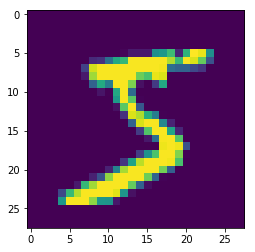

In [40]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(x_train[0])

#check image shape
x_train[0].shape

In [41]:
#next, we need to reshape our dataset inputs(x_train and x_test)
#to the shape that our model expects when we train the model.

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

#The first number is the number of images(60000 for train and 10000 for test)
#Then comes the shape of each image(28*28).
#The last number is 1 which signifies that the images are greyscaled to train

x_train[0].shape


(28, 28, 1)

In [42]:
#we need to 'one-hot-encode' our target variable. 
#we saw that the first image in the dataset is a 5. 
#this means that the sixth number in our array will have 1 and the rest of the array will be filled witb 0

from keras.utils import to_categorical

#to_categorical converts a class vector(integers) to binary class matrix

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

#here in our output, 6th number of array is 1 that means label of 1st image is 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [43]:
#create the model to train the dataset
#here we use sequential model(allows you to build a model layer by layer) of keras with dense conv2D and flatten layers

from keras.models import Sequential 
from keras.layers import Dense,Conv2D,Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#convolution layers will deal with our input images, which are seen as 2-dimensional matrices
#64 in the first layer and 32 in the second layer are the number of nodes in each layer.
#kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3*3 filter matrix
#flatten layer serves as a connection between the convolution and dense layers
#we will use Dense layer for output layer, which will have 10 nodes in our output layer, one for each digits(0-9)
#The activation on output layer 'softmax' makes the output sum up to 1 so the output can be interpreted as probabilities.


In [44]:
#compile the model using accuracy to measure model performance

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#the optimizer controls the learning rate. We will be using 'adam' as our optimizer.
#the learning rate determines how fast the optimal weights for the model are calculated.
#We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
#we will use the accuracy metric to see the accuracy score on the validation set when we train the model.


In [46]:
#train the model

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

#the purpose of validation_data is to track progress through validation loss and accuracy.
#epochs is number of times your model iterate

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1255 - acc: 0.9625 - val_loss: 0.0614 - val_acc: 0.9826
Epoch 2/3
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0626 - acc: 0.9807 - val_loss: 0.0645 - val_acc: 0.9792
Epoch 3/3
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0463 - acc: 0.9851 - val_loss: 0.0738 - val_acc: 0.9762


In [47]:
#predict first 10 images in the test set(our test set has 10000 that's why we just select 10 images)

model.predict(x_test[:10])

#in our output the highest numbered column of array is our answer for image(like, for 1st 9.99999 means our 1st image is 7(array indexed from 0))

array([[4.0410109e-07, 4.6404525e-13, 5.6472906e-08, 4.0210761e-08,
        7.3305459e-11, 4.0817115e-12, 2.9014724e-14, 9.9999785e-01,
        2.5908037e-07, 1.3582702e-06],
       [7.9650665e-05, 1.7673774e-07, 9.9991262e-01, 2.1878870e-08,
        2.1706949e-08, 1.6333840e-12, 3.1296458e-06, 3.4226214e-10,
        4.4005546e-06, 1.3408095e-09],
       [6.2394392e-06, 9.9719810e-01, 5.3827152e-06, 3.3208753e-06,
        8.4096787e-04, 1.5518491e-04, 9.4934848e-07, 2.8019835e-04,
        1.4312660e-03, 7.8317855e-05],
       [9.9975222e-01, 7.1318307e-10, 2.6703335e-06, 6.4893413e-08,
        1.3287147e-04, 2.8367381e-10, 9.3597111e-05, 7.4767223e-07,
        6.5707027e-06, 1.1207509e-05],
       [1.4488922e-06, 8.5118891e-11, 7.8517576e-07, 5.3642541e-08,
        9.9998999e-01, 4.5847159e-10, 5.9000018e-07, 3.7696523e-06,
        6.5780647e-08, 3.1963225e-06],
       [8.9303848e-07, 9.9921584e-01, 8.4493671e-08, 4.9824439e-07,
        5.6280417e-04, 4.5585523e-08, 1.8867045e-08, 1.17

In [48]:
#to make sure our output is right or wrong, you can compare with above output

y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)